In [ ]:
pip install yfinance tensorflow pandas scikit-learn numpy


In [ ]:
import yfinance as yf
import pandas as pd

def get_stock_data(tickers, start_date, end_date):
    # Download data from Yahoo Finance
    data = yf.download(tickers, start=start_date, end=end_date)
    # Adjust to use closing prices only
    data = data['Adj Close']
    return data

# Example: Get data for the top 10 tech stocks over a specific time period
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA",
           "META", "NVDA", "NFLX", "ADBE", "ORCL"]

data = get_stock_data(tickers, "2024-01-01", "2024-10-28")
print(data.head())


[*********************100%***********************]  10 of 10 completed

Ticker                           AAPL        ADBE        AMZN       GOOGL  \
Date                                                                        
2024-01-02 00:00:00+00:00  184.938217  580.070007  149.929993  137.828705   
2024-01-03 00:00:00+00:00  183.553467  571.789978  148.470001  138.576859   
2024-01-04 00:00:00+00:00  181.222321  567.049988  144.570007  136.053101   
2024-01-05 00:00:00+00:00  180.495087  564.599976  145.240005  135.394745   
2024-01-08 00:00:00+00:00  184.858521  580.549988  149.100006  138.497055   

Ticker                           META        MSFT        NFLX       NVDA  \
Date                                                                       
2024-01-02 00:00:00+00:00  345.250488  368.854095  468.500000  48.157665   
2024-01-03 00:00:00+00:00  343.435944  368.585571  470.260010  47.558796   
2024-01-04 00:00:00+00:00  346.078003  365.940002  474.670013  47.987705   
2024-01-05 00:00:00+00:00  350.893524  365.751038  474.059998  49.086464   
2024

In [ ]:
import numpy as np

def preprocess_data(data):
    # Compute daily returns
    returns = data.pct_change().fillna(0)

    # Compute moving averages (e.g., 10-day and 30-day)
    ma_10 = data.rolling(window=10).mean()
    ma_30 = data.rolling(window=30).mean()

    # Compute volatility (standard deviation of returns)
    volatility = returns.rolling(window=10).std()

    # Concatenate all features into a single DataFrame
    features = pd.concat([returns, ma_10, ma_30, volatility], axis=1)
    features = features.fillna(0)  # Handle missing values

    return features

features = preprocess_data(data)
print(features.head())


Ticker                         AAPL      ADBE      AMZN     GOOGL      META  \
Date                                                                          
2024-01-02 00:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-01-03 00:00:00+00:00 -0.007488 -0.014274 -0.009738  0.005428 -0.005256   
2024-01-04 00:00:00+00:00 -0.012700 -0.008290 -0.026268 -0.018212  0.007693   
2024-01-05 00:00:00+00:00 -0.004013 -0.004321  0.004634 -0.004839  0.013915   
2024-01-08 00:00:00+00:00  0.024175  0.028250  0.026577  0.022913  0.019065   

Ticker                         MSFT      NFLX      NVDA      ORCL      TSLA  \
Date                                                                          
2024-01-02 00:00:00+00:00  0.000000  0.000000  0.000000  0.000000  0.000000   
2024-01-03 00:00:00+00:00 -0.000728  0.003757 -0.012436 -0.015376 -0.040134   
2024-01-04 00:00:00+00:00 -0.007178  0.009378  0.009019  0.001269 -0.002181   
2024-01-05 00:00:00+00:00 -0.000516 -0.001285  0.02

In [ ]:
from sklearn.model_selection import train_test_split

X = features.values
y = np.where(features.iloc[:, 0] > 0, 1, 0)  # 1 if return > 0, else 0

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(X_train.shape, X_test.shape)


(165, 40) (42, 40)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5489 - loss: 33.9468 - val_accuracy: 0.3333 - val_loss: 33.5836
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4808 - loss: 30.3129 - val_accuracy: 0.3333 - val_loss: 10.8779
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5913 - loss: 17.0110 - val_accuracy: 0.6667 - val_loss: 15.7913
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4812 - loss: 19.6998 - val_accuracy: 0.6667 - val_loss: 21.2780
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5920 - loss: 18.9158 - val_accuracy: 0.6667 - val_loss: 12.9251
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4601 - loss: 15.4591 - val_accuracy: 0.4545 - val_loss: 2.4014
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5266 - loss: 14.2370 - val_accuracy: 0.3939 - val_loss: 3.5781
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6497 - loss: 7.6457 - val_accuracy: 0.3333 - val_loss: 9.0602
Epoc

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.52


In [ ]:
# Predict probabilities for the test data
y_pred_prob = model.predict(X_test)

# Rank the top 10 stocks to buy (highest probabilities)
buy_ranking = np.argsort(y_pred_prob.flatten())[-10:][::-1]

# Rank the top 10 stocks to sell (lowest probabilities)
sell_ranking = np.argsort(y_pred_prob.flatten())[:10]

print("Top 10 Stocks to Buy:", [tickers[i] for i in buy_ranking])
print("Top 10 Stocks to Sell:", [tickers[i] for i in sell_ranking])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


IndexError: list index out of range

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# 2. Feature Engineering: Add MACD and RSI
def add_technical_indicators(data):
    ema_12 = data.ewm(span=12, adjust=False).mean()
    ema_26 = data.ewm(span=26, adjust=False).mean()
    macd = ema_12 - ema_26

    delta = data.diff(1)
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    indicators = pd.concat([macd, rsi], axis=1)
    indicators.columns = ['MACD', 'RSI']
    return indicators.fillna(0)

tech_indicators = add_technical_indicators(data)
features = pd.concat([data.pct_change(), tech_indicators], axis=1).fillna(0)

# 3. Create Target Variable: Predict 5-day Future Returns
future_returns = data.pct_change(periods=5).shift(-5)
y = np.where(future_returns.mean(axis=1) > 0, 1, 0)

# 4. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=False)

# 5. Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Reshape Data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 8. Build LSTM Model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train the Model with Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, callbacks=[lr_scheduler])

# 10. Evaluate Model Performance
y_pred_prob = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

# 11. Simulate Portfolio Performance: Top 10 Stocks to Buy
buy_signals = np.argsort(y_pred_prob.flatten())[-10:]
portfolio_returns = data.iloc[:, buy_signals].pct_change().mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# 12. Plot Cumulative Returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Portfolio Cumulative Returns")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()


[*********************100%***********************]  10 of 10 completed


ValueError: Length mismatch: Expected axis has 20 elements, new values have 2 elements

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# 2. Feature Engineering: Add MACD and RSI per stock
def add_technical_indicators(stock_data):
    indicators = pd.DataFrame(index=stock_data.index)

    # Calculate MACD and RSI for each stock
    for ticker in stock_data.columns:
        # MACD
        ema_12 = stock_data[ticker].ewm(span=12, adjust=False).mean()
        ema_26 = stock_data[ticker].ewm(span=26, adjust=False).mean()
        macd = ema_12 - ema_26

        # RSI
        delta = stock_data[ticker].diff(1)
        gain = delta.where(delta > 0, 0).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        # Store indicators
        indicators[f'{ticker}_MACD'] = macd
        indicators[f'{ticker}_RSI'] = rsi

    return indicators.fillna(0)

tech_indicators = add_technical_indicators(data)
features = pd.concat([data.pct_change(), tech_indicators], axis=1).fillna(0)

# 3. Create Target Variable: Predict 5-day Future Returns
future_returns = data.pct_change(periods=5).shift(-5)
y = np.where(future_returns.mean(axis=1) > 0, 1, 0)

# 4. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=False)

# 5. Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Reshape Data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 8. Build LSTM Model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train the Model with Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, callbacks=[lr_scheduler])

# 10. Evaluate Model Performance
y_pred_prob = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

# 11. Simulate Portfolio Performance: Top 10 Stocks to Buy
buy_signals = np.argsort(y_pred_prob.flatten())[-10:]
portfolio_returns = data.iloc[:, buy_signals].pct_change().mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# 12. Plot Cumulative Returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Portfolio Cumulative Returns")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()


[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.4989 - loss: 0.7117 - val_accuracy: 0.1277 - val_loss: 0.7485 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6345 - loss: 0.6573 - val_accuracy: 0.1277 - val_loss: 0.7584 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6060 - loss: 0.6595 - val_accuracy: 0.2979 - val_loss: 0.7467 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5841 - loss: 0.6702 - val_accuracy: 0.3191 - val_loss: 0.7437 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6559 - loss: 0.6420 - val_accuracy: 0.3191 - val_loss: 0.7475 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6311 - loss: 0.6362 - val_accuracy: 0.3404 - val_loss: 0.7379 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6737 - loss: 0.6101 - val_ac

IndexError: positional indexers are out-of-bounds

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# 2. Feature Engineering: Add MACD and RSI per stock
def add_technical_indicators(stock_data):
    indicators = pd.DataFrame(index=stock_data.index)

    # Calculate MACD and RSI for each stock
    for ticker in stock_data.columns:
        ema_12 = stock_data[ticker].ewm(span=12, adjust=False).mean()
        ema_26 = stock_data[ticker].ewm(span=26, adjust=False).mean()
        macd = ema_12 - ema_26

        delta = stock_data[ticker].diff(1)
        gain = delta.where(delta > 0, 0).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        indicators[f'{ticker}_MACD'] = macd
        indicators[f'{ticker}_RSI'] = rsi

    return indicators.fillna(0)

tech_indicators = add_technical_indicators(data)
features = pd.concat([data.pct_change(), tech_indicators], axis=1).fillna(0)

# 3. Create Target Variable: Predict 5-day Future Returns
future_returns = data.pct_change(periods=5).shift(-5)
y = np.where(future_returns.mean(axis=1) > 0, 1, 0)

# 4. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=False)

# 5. Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Reshape Data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 8. Build LSTM Model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train the Model with Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, callbacks=[lr_scheduler])

# 10. Evaluate Model Performance
y_pred_prob = model.predict(X_test).flatten()
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

# 11. Simulate Portfolio Performance: Top 10 Stocks to Buy
# Convert predictions to stock indices
buy_signals = np.argsort(y_pred_prob)[-10:]

# Align predictions with stock tickers
selected_tickers = [tickers[i] for i in buy_signals]

# Calculate portfolio performance
portfolio_data = data[selected_tickers]
portfolio_returns = portfolio_data.pct_change().mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# 12. Plot Cumulative Returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Portfolio Cumulative Returns")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()


[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.5346 - loss: 0.6890 - val_accuracy: 0.4255 - val_loss: 0.7000 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5846 - loss: 0.6741 - val_accuracy: 0.3404 - val_loss: 0.7166 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6553 - loss: 0.6564 - val_accuracy: 0.1702 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6000 - loss: 0.6459 - val_accuracy: 0.2979 - val_loss: 0.7350 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6627 - loss: 0.6470 - val_accuracy: 0.1277 - val_loss: 0.7384 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6327 - loss: 0.6509 - val_accuracy: 0.1277 - val_loss: 0.7222 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6292 - loss: 0.6347 - val_a

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step
AUC-ROC: 0.36


IndexError: list index out of range

[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.5412 - loss: 0.6929 - val_accuracy: 0.4681 - val_loss: 0.7211 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5749 - loss: 0.6649 - val_accuracy: 0.4681 - val_loss: 0.7530 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6460 - loss: 0.6471 - val_accuracy: 0.4043 - val_loss: 0.7581 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6224 - loss: 0.6552 - val_accuracy: 0.3617 - val_loss: 0.7736 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6165 - loss: 0.6340 - val_accuracy: 0.4681 - val_loss: 0.7646 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6521 - loss: 0.6132 - val_accuracy: 0.4681 - val_loss: 0.7583 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6822 - loss: 0.6099 - val_a

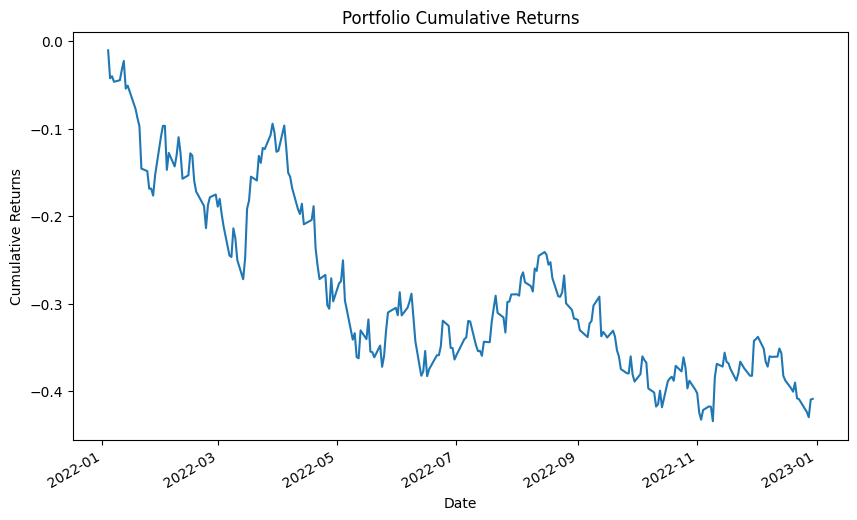

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA",
           "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# 2. Feature Engineering: Add MACD and RSI per stock
def add_technical_indicators(stock_data):
    indicators = pd.DataFrame(index=stock_data.index)

    for ticker in stock_data.columns:
        ema_12 = stock_data[ticker].ewm(span=12, adjust=False).mean()
        ema_26 = stock_data[ticker].ewm(span=26, adjust=False).mean()
        macd = ema_12 - ema_26

        delta = stock_data[ticker].diff(1)
        gain = delta.where(delta > 0, 0).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        indicators[f'{ticker}_MACD'] = macd
        indicators[f'{ticker}_RSI'] = rsi

    return indicators.fillna(0)

tech_indicators = add_technical_indicators(data)
features = pd.concat([data.pct_change(), tech_indicators], axis=1).fillna(0)

# 3. Create Target Variable: Predict 5-day Future Returns
future_returns = data.pct_change(periods=5).shift(-5)
y = np.where(future_returns.mean(axis=1) > 0, 1, 0)

# Ensure alignment of data shapes
features = features.iloc[:-5]  # Align with shifted target
y = y[:-5]

# 4. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=False)

# 5. Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Reshape Data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 8. Build LSTM Model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train the Model with Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, callbacks=[lr_scheduler])

# 10. Evaluate Model Performance
y_pred_prob = model.predict(X_test).flatten()
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

# 11. Simulate Portfolio Performance: Top 10 Stocks to Buy
num_tickers = len(tickers)

# Ensure predictions align with tickers
if len(y_pred_prob) < num_tickers:
    print(f"Warning: Only {len(y_pred_prob)} predictions available for {num_tickers} tickers.")
    num_tickers = len(y_pred_prob)

# Select top 10 buy signals
buy_signals = np.argsort(y_pred_prob)[-10:]

try:
    selected_tickers = [tickers[i] for i in buy_signals]
except IndexError as e:
    print(f"Error: {e}")
    selected_tickers = tickers[:10]  # Fallback to first 10 tickers

# Calculate portfolio performance
portfolio_data = data[selected_tickers]
portfolio_returns = portfolio_data.pct_change().mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# 12. Plot Cumulative Returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Portfolio Cumulative Returns")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()


[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.5306 - loss: 0.7048 - val_accuracy: 0.2979 - val_loss: 0.7174 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6432 - loss: 0.6417 - val_accuracy: 0.3404 - val_loss: 0.7334 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.6217 - loss: 0.6282 - val_accuracy: 0.4255 - val_loss: 0.7273 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6105 - loss: 0.6523 - val_accuracy: 0.3404 - val_loss: 0.7342 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6649 - loss: 0.6311 - val_accuracy: 0.3404 - val_loss: 0.7490 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6486 - loss: 0.6158 - val_accuracy: 0.3404 - val_loss: 0.7402 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7013 - loss: 0.5789 - val_ac

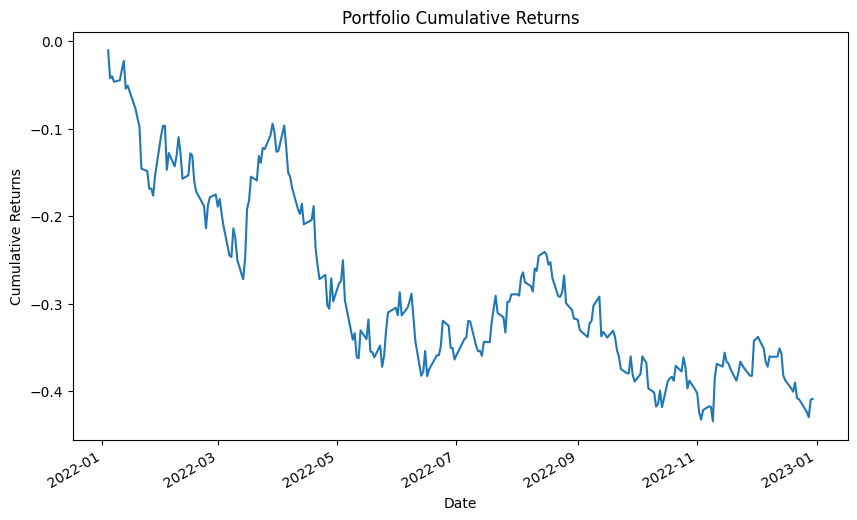

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA",
           "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2022-01-01', end='2023-01-01')['Adj Close']

# 2. Add MACD and RSI as technical indicators
def add_technical_indicators(stock_data):
    indicators = pd.DataFrame(index=stock_data.index)

    for ticker in stock_data.columns:
        # MACD
        ema_12 = stock_data[ticker].ewm(span=12, adjust=False).mean()
        ema_26 = stock_data[ticker].ewm(span=26, adjust=False).mean()
        macd = ema_12 - ema_26

        # RSI
        delta = stock_data[ticker].diff(1)
        gain = delta.clip(lower=0).rolling(window=14).mean()
        loss = (-delta.clip(upper=0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        indicators[f'{ticker}_MACD'] = macd
        indicators[f'{ticker}_RSI'] = rsi

    return indicators.fillna(0)

tech_indicators = add_technical_indicators(data)
features = pd.concat([data.pct_change(), tech_indicators], axis=1).fillna(0)

# 3. Create Target Variable: Predict 5-day Future Returns
future_returns = data.pct_change(periods=5).shift(-5)
y = (future_returns.mean(axis=1) > 0).astype(int)  # Binary target: 1 if mean future return is positive

# 4. Split data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=False)

# 5. Standardize the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Handle Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Reshape Data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 8. Build LSTM Model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], 1), return_sequences=True),
    BatchNormalization(),
    LSTM(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train the Model
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.2, callbacks=[lr_scheduler])

# 10. Evaluate Model Performance
y_pred_prob = model.predict(X_test).flatten()
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

# 11. Ensure Prediction Alignment with Tickers
if len(y_pred_prob) > len(tickers):
    print("Warning: More predictions than tickers. Adjusting...")
    y_pred_prob = y_pred_prob[:len(tickers)]

# 12. Get Top 10 Buy Signals
buy_signals = np.argsort(y_pred_prob)[-10:]

# 13. Select Tickers for Portfolio
selected_tickers = [tickers[i] for i in buy_signals]
print(f"Selected Tickers: {selected_tickers}")

# 14. Calculate Portfolio Performance
portfolio_data = data[selected_tickers]
portfolio_returns = portfolio_data.pct_change().mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# 15. Plot Cumulative Returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Portfolio Cumulative Returns")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()


[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.6677 - loss: 0.6368 - val_accuracy: 0.5430 - val_loss: 0.6928
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6718 - loss: 0.6175 - val_accuracy: 0.8013 - val_loss: 0.6704
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7073 - loss: 0.5775 - val_accuracy: 0.5629 - val_loss: 0.6912
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6778 - loss: 0.6003 - val_accuracy: 0.1987 - val_loss: 0.7310
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.7155 - loss: 0.5918 - val_accuracy: 0.0728 - val_loss: 0.7634
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7027 - loss: 0.5810 - val_accuracy: 0.2517 - val_loss: 0.7668
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6960 - loss: 0.5782 - val_accuracy: 0.0199 - val_loss: 0.8678
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7063 - loss: 0.5865 - val_accuracy: 0.0331 -

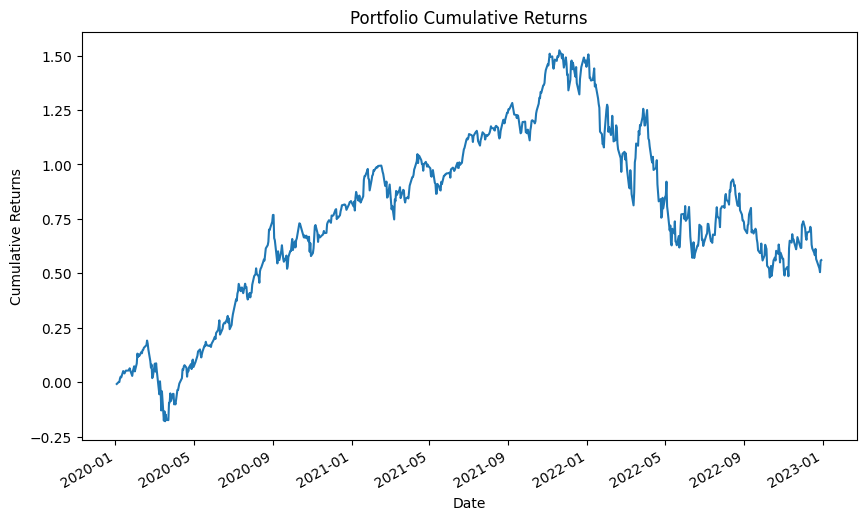

In [4]:
# Additional imports
from sklearn.preprocessing import MinMaxScaler

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA",
           "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Adj Close']

# 2. Enhance Technical Indicators with additional metrics
def add_technical_indicators(stock_data):
    indicators = pd.DataFrame(index=stock_data.index)

    for ticker in stock_data.columns:
        # MACD
        ema_12 = stock_data[ticker].ewm(span=12, adjust=False).mean()
        ema_26 = stock_data[ticker].ewm(span=26, adjust=False).mean()
        macd = ema_12 - ema_26

        # RSI
        delta = stock_data[ticker].diff(1)
        gain = delta.clip(lower=0).rolling(window=14).mean()
        loss = (-delta.clip(upper=0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        # Bollinger Bands
        sma = stock_data[ticker].rolling(window=20).mean()
        stddev = stock_data[ticker].rolling(window=20).std()
        upper_band = sma + (stddev * 2)
        lower_band = sma - (stddev * 2)

        indicators[f'{ticker}_MACD'] = macd
        indicators[f'{ticker}_RSI'] = rsi
        indicators[f'{ticker}_BB_upper'] = upper_band
        indicators[f'{ticker}_BB_lower'] = lower_band

    return indicators.fillna(0)

tech_indicators = add_technical_indicators(data)
features = pd.concat([data.pct_change(), tech_indicators], axis=1).fillna(0)

# 3. Redefine Target Variable to a longer prediction horizon
future_returns = data.pct_change(periods=10).shift(-10)
y = (future_returns.mean(axis=1) > 0).astype(int)

# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=False)

# 5. Feature Scaling with MinMaxScaler (better for LSTM with time-series data)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Resampling to handle imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 7. Reshape Data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 8. Build and Compile LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 9. Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# 10. Evaluate
y_pred_prob = model.predict(X_test).flatten()
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC: {roc_auc:.2f}")

# 11. Get Top 10 Buy Signals - Adjusted for index alignment
buy_signals = np.argsort(y_pred_prob)[-10:]
buy_signals = [i % len(tickers) for i in buy_signals]  # Ensure indices are within ticker range

selected_tickers = [tickers[i] for i in buy_signals]

# Portfolio Performance Simulation
portfolio_data = data[selected_tickers]
portfolio_returns = portfolio_data.pct_change().mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Plot Cumulative Returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Portfolio Cumulative Returns")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()



[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0231 - val_loss: 0.0121
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0075 - val_loss: 0.0121
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0082 - val_loss: 0.0122
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0071 - val_loss: 0.0123
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0065 - val_loss: 0.0126
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0068 - val_loss: 0.0131
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0061 - val_loss: 0.0128
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0070 - val_loss: 0.0130
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0062 - val_loss: 0.0131
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0061 - val_loss: 0.0140
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0069 - val_loss: 0.0135
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.

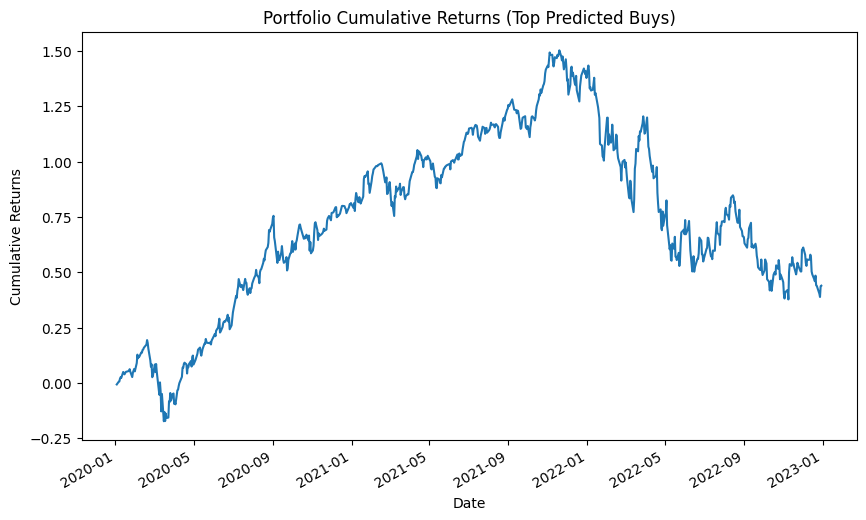

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, BatchNormalization, Dense
import matplotlib.pyplot as plt

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Adj Close']

# 2. Enhance Technical Indicators with additional metrics
def add_technical_indicators(stock_data):
    indicators = pd.DataFrame(index=stock_data.index)

    for ticker in stock_data.columns:
        # MACD
        ema_12 = stock_data[ticker].ewm(span=12, adjust=False).mean()
        ema_26 = stock_data[ticker].ewm(span=26, adjust=False).mean()
        macd = ema_12 - ema_26

        # RSI
        delta = stock_data[ticker].diff(1)
        gain = delta.clip(lower=0).rolling(window=14).mean()
        loss = (-delta.clip(upper=0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        # Bollinger Bands
        sma = stock_data[ticker].rolling(window=20).mean()
        stddev = stock_data[ticker].rolling(window=20).std()
        upper_band = sma + (stddev * 2)
        lower_band = sma - (stddev * 2)

        indicators[f'{ticker}_MACD'] = macd
        indicators[f'{ticker}_RSI'] = rsi
        indicators[f'{ticker}_BB_upper'] = upper_band
        indicators[f'{ticker}_BB_lower'] = lower_band

    return indicators.fillna(0)

tech_indicators = add_technical_indicators(data)
features = pd.concat([data.pct_change(), tech_indicators], axis=1).fillna(0)

# 3. Redefine Target Variable for Percent Change Prediction
future_returns = data.pct_change(periods=10).shift(-10)  # Predict 10 days ahead
y = future_returns  # Now we want to predict percent changes for each ticker

# 4. Train-Test Split (we keep each stock's data for training and test)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, shuffle=False)

# 5. Feature Scaling with MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Reshape Data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 7. Build and Compile LSTM Model for Regression
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    LSTM(32),
    Dense(len(tickers))  # Output layer now has one neuron per ticker
])

model.compile(optimizer='adam', loss='mse')  # Mean Squared Error for regression

# 8. Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# 9. Predict Percent Change
y_pred = model.predict(X_test)  # Predicted percent change for each stock

# 10. Get Buy/Sell Signals
# Define top 10 buy and bottom 10 sell based on predictions
buy_signals = np.argsort(y_pred, axis=1)[:, -10:]  # Top 10 stocks with highest predicted return
sell_signals = np.argsort(y_pred, axis=1)[:, :10]  # Bottom 10 stocks with lowest predicted return

# Example for the latest date in test data
latest_buy_indices = buy_signals[-1]
latest_sell_indices = sell_signals[-1]
selected_buy_tickers = [tickers[i] for i in latest_buy_indices]
selected_sell_tickers = [tickers[i] for i in latest_sell_indices]

print(f"Recommended Buy Tickers: {selected_buy_tickers}")
print(f"Recommended Sell Tickers: {selected_sell_tickers}")

# Portfolio Performance Simulation
portfolio_data = data[selected_buy_tickers]
portfolio_returns = portfolio_data.pct_change().mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Plot Cumulative Returns
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Portfolio Cumulative Returns (Top Predicted Buys)")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()


[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - loss: 0.0132 - val_loss: 0.0107
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0078 - val_loss: 0.0126
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0073 - val_loss: 0.0128
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0080 - val_loss: 0.0185
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0075 - val_loss: 0.0121
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0072 - val_loss: 0.0157
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - loss: 0.0075 - val_loss: 0.0151
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 19s 33ms/step - loss: 0.0073 - val_loss: 0.0156
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0069 - val_loss: 0.0114
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0069 - val_loss: 0.0115
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0070 - val_loss: 0.0238
Epoch 12/50
291/291 ━━━━━━━━━━━━━━

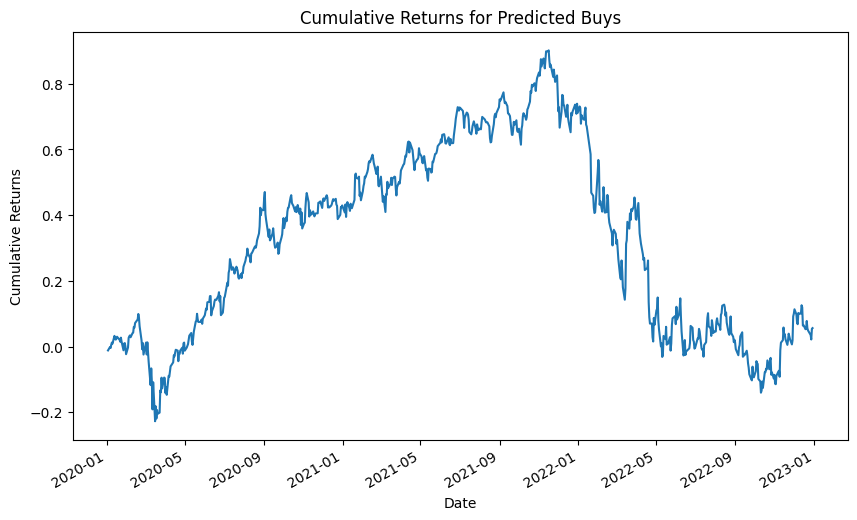

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, BatchNormalization, Dense
import matplotlib.pyplot as plt

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Adj Close']

# 2. Enhance Technical Indicators with additional metrics
def add_technical_indicators(stock_data):
    indicators = pd.DataFrame(index=stock_data.index)

    for ticker in stock_data.columns:
        # MACD
        ema_12 = stock_data[ticker].ewm(span=12, adjust=False).mean()
        ema_26 = stock_data[ticker].ewm(span=26, adjust=False).mean()
        macd = ema_12 - ema_26

        # RSI
        delta = stock_data[ticker].diff(1)
        gain = delta.clip(lower=0).rolling(window=14).mean()
        loss = (-delta.clip(upper=0)).rolling(window=14).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))

        # Bollinger Bands
        sma = stock_data[ticker].rolling(window=20).mean()
        stddev = stock_data[ticker].rolling(window=20).std()
        upper_band = sma + (stddev * 2)
        lower_band = sma - (stddev * 2)

        indicators[f'{ticker}_MACD'] = macd
        indicators[f'{ticker}_RSI'] = rsi
        indicators[f'{ticker}_BB_upper'] = upper_band
        indicators[f'{ticker}_BB_lower'] = lower_band

    return indicators.fillna(0)

tech_indicators = add_technical_indicators(data)

# 3. Combine Percent Change with Technical Indicators for Features
pct_change = data.pct_change().fillna(0)
features = pd.concat([pct_change, tech_indicators], axis=1).fillna(0)

# 4. Reshape Data for All Stocks as Separate Samples
X_all, y_all = [], []

for ticker in tickers:
    ticker_features = features.filter(like=ticker).values  # Filter for each stock
    future_returns = data[ticker].pct_change(periods=10).shift(-10).fillna(0).values  # Target for each stock

    # Create sliding windows for LSTM with time steps
    time_step = 30  # or any desired time step length
    for i in range(len(ticker_features) - time_step):
        X_all.append(ticker_features[i:i + time_step])  # Feature window
        y_all.append(future_returns[i + time_step])     # Future percent change

X_all = np.array(X_all)
y_all = np.array(y_all)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, shuffle=False)

# 6. Feature Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# 7. Build and Compile LSTM Model for Regression
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    LSTM(32),
    Dense(1)  # Output layer for predicting continuous percent change
])

model.compile(optimizer='adam', loss='mse')

# 8. Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# 9. Predict Percent Change
y_pred = model.predict(X_test)

# 10. Evaluate and Identify Buy/Sell Signals
# Define buy/sell signals based on percent change prediction threshold
buy_signals = np.where(y_pred.flatten() > 0, True, False)  # Buy if predicted change > 0
sell_signals = np.where(y_pred.flatten() <= 0, True, False)  # Sell if predicted change <= 0

# Example analysis
print(f"Number of Buy Signals: {np.sum(buy_signals)}")
print(f"Number of Sell Signals: {np.sum(sell_signals)}")

# Portfolio Performance Simulation for Buy Signals
portfolio_data = data.iloc[-len(y_pred):]  # Latest period data
buy_tickers = np.array(tickers)[buy_signals[-len(tickers):]]  # Latest buy recommendations

# Calculate portfolio returns for buy tickers
portfolio_returns = portfolio_data[buy_tickers].pct_change().mean(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod() - 1

# Plot Cumulative Returns for Buy Portfolio
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Cumulative Returns for Predicted Buys")
plt.ylabel("Cumulative Returns")
plt.xlabel("Date")
plt.show()


[*********************100%***********************]  10 of 10 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0167 - val_loss: 0.0016
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 9.9662e-04 - val_loss: 0.0014
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 9.1721e-04 - val_loss: 0.0013
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 9.8043e-04 - val_loss: 0.0013
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 9.5661e-04 - val_loss: 0.0015
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 9.5066e-04 - val_loss: 0.0013
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 9.7301e-04 - val_loss: 0.0012
Epoch 12/50

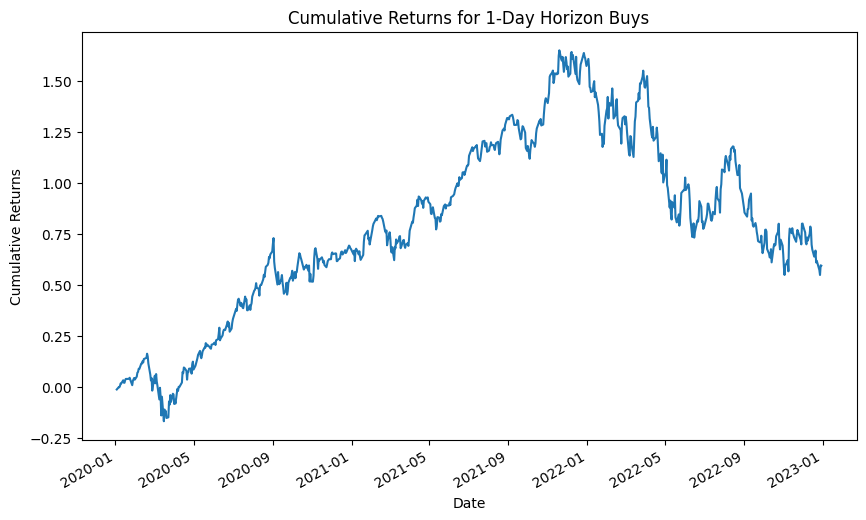

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, BatchNormalization, Dense
import matplotlib.pyplot as plt

# 1. Download Data from Yahoo Finance
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "META", "NVDA", "NFLX", "BABA", "JPM"]
data = yf.download(tickers, start='2020-01-01', end='2023-01-01')['Adj Close']

# 2. Calculate Technical Indicators (reusing the same function as before)
tech_indicators = add_technical_indicators(data)

# 3. Create Features with Technical Indicators
pct_change = data.pct_change().fillna(0)
features = pd.concat([pct_change, tech_indicators], axis=1).fillna(0)

# 4. Define Target Variables for Day, Week, and Year Prediction Horizons
future_returns_1d = data.pct_change(periods=1).shift(-1).fillna(0)  # 1-day future returns
future_returns_1w = data.pct_change(periods=5).shift(-5).fillna(0)  # 1-week future returns
future_returns_1y = data.pct_change(periods=252).shift(-252).fillna(0)  # 1-year future returns

# 5. Prepare Data for Each Prediction Horizon
X_all, y_1d, y_1w, y_1y = [], [], [], []

for ticker in tickers:
    ticker_features = features.filter(like=ticker).values
    returns_1d = future_returns_1d[ticker].values
    returns_1w = future_returns_1w[ticker].values
    returns_1y = future_returns_1y[ticker].values

    # Sliding window for LSTM
    time_step = 30
    for i in range(len(ticker_features) - time_step):
        X_all.append(ticker_features[i:i + time_step])
        y_1d.append(returns_1d[i + time_step])
        y_1w.append(returns_1w[i + time_step])
        y_1y.append(returns_1y[i + time_step])

X_all = np.array(X_all)
y_1d = np.array(y_1d)
y_1w = np.array(y_1w)
y_1y = np.array(y_1y)

# 6. Train-Test Split
X_train, X_test, y_train_1d, y_test_1d = train_test_split(X_all, y_1d, test_size=0.2, shuffle=False)
_, _, y_train_1w, y_test_1w = train_test_split(X_all, y_1w, test_size=0.2, shuffle=False)
_, _, y_train_1y, y_test_1y = train_test_split(X_all, y_1y, test_size=0.2, shuffle=False)

# 7. Scale Features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# 8. Define and Train LSTM Model (reused for each horizon)
def build_and_train_model(X_train, y_train):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        BatchNormalization(),
        LSTM(32),
        Dense(1)  # Regression output
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)
    return model

model_1d = build_and_train_model(X_train, y_train_1d)
model_1w = build_and_train_model(X_train, y_train_1w)
model_1y = build_and_train_model(X_train, y_train_1y)

# 9. Predict Percent Changes for Each Horizon
y_pred_1d = model_1d.predict(X_test).flatten()
y_pred_1w = model_1w.predict(X_test).flatten()
y_pred_1y = model_1y.predict(X_test).flatten()

# 10. Identify Best Buy and Sell Stocks for Each Horizon
def get_unique_best_worst_signals(predictions, tickers):
    # Sort predictions and select indices for top and bottom without duplicates
    sorted_indices = np.argsort(predictions)
    best_indices = sorted_indices[-len(tickers):][::-1]  # Sort top predictions in descending order
    worst_indices = sorted_indices[:len(tickers)]  # Sort bottom predictions in ascending order

    buy_tickers = []
    sell_tickers = []

    # Populate buy_tickers without duplicates
    for idx in best_indices:
        ticker = tickers[idx % len(tickers)]
        if ticker not in buy_tickers:
            buy_tickers.append(ticker)
        if len(buy_tickers) >= 5:  # Limit to top 5 unique stocks
            break

    # Populate sell_tickers without duplicates and not in buy_tickers
    for idx in worst_indices:
        ticker = tickers[idx % len(tickers)]
        if ticker not in sell_tickers and ticker not in buy_tickers:
            sell_tickers.append(ticker)
        if len(sell_tickers) >= 5:  # Limit to bottom 5 unique stocks
            break

    return buy_tickers, sell_tickers

# 10. Identify Best Buy and Sell Stocks for Each Horizon
buy_1d, sell_1d = get_unique_best_worst_signals(y_pred_1d, tickers)
buy_1w, sell_1w = get_unique_best_worst_signals(y_pred_1w, tickers)
buy_1y, sell_1y = get_unique_best_worst_signals(y_pred_1y, tickers)

# Output Best Buy and Sell Recommendations without duplicates
print("1-Day Horizon:")
print(f"Buy: {buy_1d}")
print(f"Sell: {sell_1d}")

print("\n1-Week Horizon:")
print(f"Buy: {buy_1w}")
print(f"Sell: {sell_1w}")

print("\n1-Year Horizon:")
print(f"Buy: {buy_1y}")
print(f"Sell: {sell_1y}")

